<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Сергей! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

# Проект "Машинки"

**Описание исследования:**

Наше исследование направлено на создание модели, предсказывающей рыночную стоимость автомобиля по вхоным параметрам для сервиса "Не бит, не крашен". Заказчик попросил использовать LightGBM и другие модели по нашему выбору. Заказчик указал, что ему особенно важны качество модели, время её работы и время обучения. В качестве метрики качества будет использоваться RMSE

**Цель исследования:**
Подобрать модель машинного обучения для предсказания рыночной цены на авто

**Задачи исследования:**

1. Проверить данные на выбросы, дубликаты и пропуски
2. Провести исследоватеорреляционный анализ
3. Подготовить данные для моделей
4. Обучить модели
5. Выбрать самую мощную модель по качеству метрики, времени обучения и времени предсказания

**Описание данных:**

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

**Целевой признак:**
- Price — цена (евро)

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [Изучение общей информации о данных](#Предварительный_анализ)

***Часть 2. Подготовка данных:***
* [Удаление дубликатов, пропусков, поиск аномалий](#Предобработа_данных)
* [Визуализация данных, поиск взаимосвязей между данными](#Исследовательский_анализ_данных)

***Часть 3. Обучение моделей:***
* [Кодирование и масштабирование признаков](#Подготовка_данных)
* [Обучение и предсказание модели линейной регрессии](#Модель_регрессии)
* [Обучение и предсказание моделей дерева решений](#Модель_дерево_решений) 
* [Обучение и предсказание модели лассо](#Модель_лассо) 
* [Обучение и предсказание модели LightGBM](#Модель_LightGBM) 
* [Подготовка данных, обучение и предсказание модели CatBoost](#Модель_CatBoost) 

***Выводы:***
* [Итоговые выводы](#Итоговые_выводы) 

In [1]:
#!pip install phik -q
#!pip install catboost -q
#!pip install lightgbm -q
#!pip install -U scikit-learn==1.1.3 -q

# Библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import phik
from catboost import CatBoostRegressor, cv, Pool
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

    
RANDOM_STATE = 42
TEST_SIZE = 0.25

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [3]:
def info_about_df(df):
    display(df.head(10))
    df.info()

    numeric_columns = df.select_dtypes(include=['number']).columns
   


    for column in numeric_columns:
        plt.figure(figsize=(12, 15))
        plt.hist(df[column], bins=20, color='lightcoral', edgecolor='black')
        plt.title(f'Гистограмма для колонки {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.show()

In [4]:
def reader(name):
    try:
        data_train = pd.read_csv(f'/datasets/{name}.csv')
    except:
        data_train = pd.read_csv(f'C:/Users/simuk/Desktop/IT/проект/{name}.csv')
    return data_train

In [5]:
df = reader('autos')

# Предвариельный_анализ

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

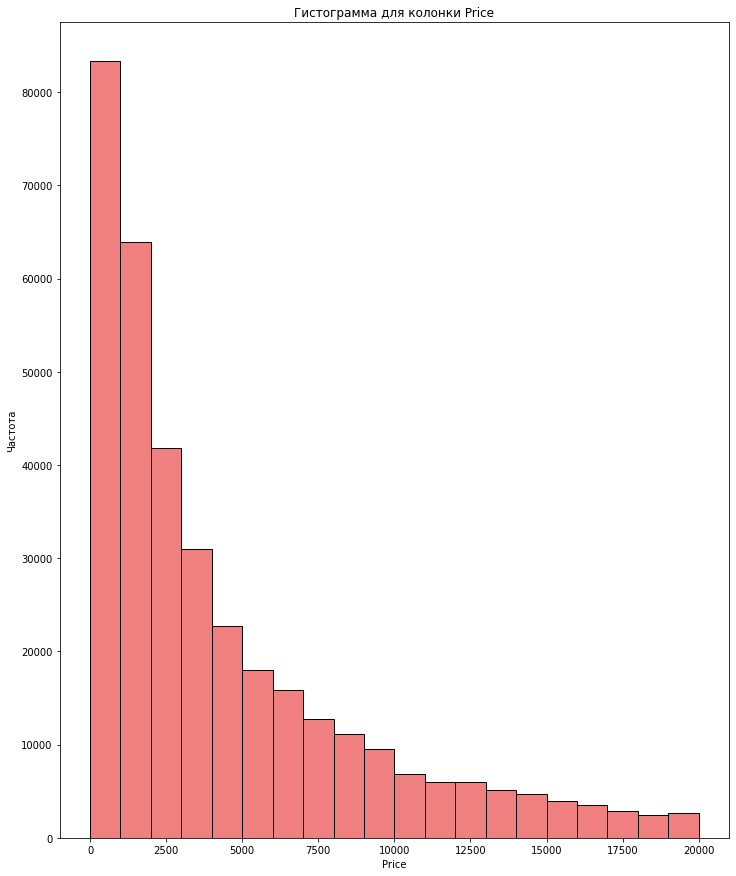

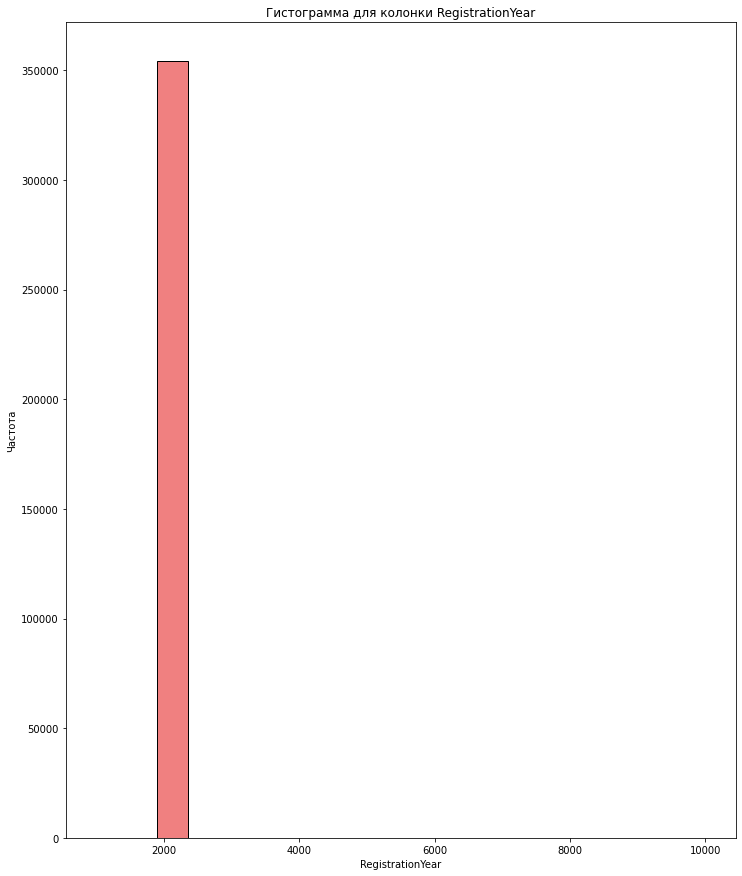

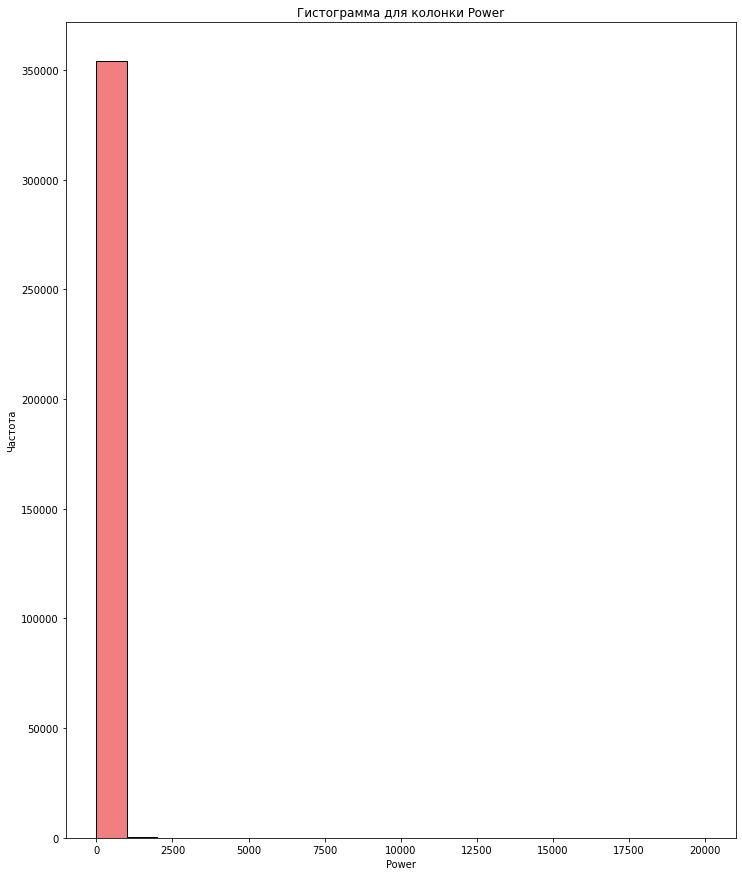

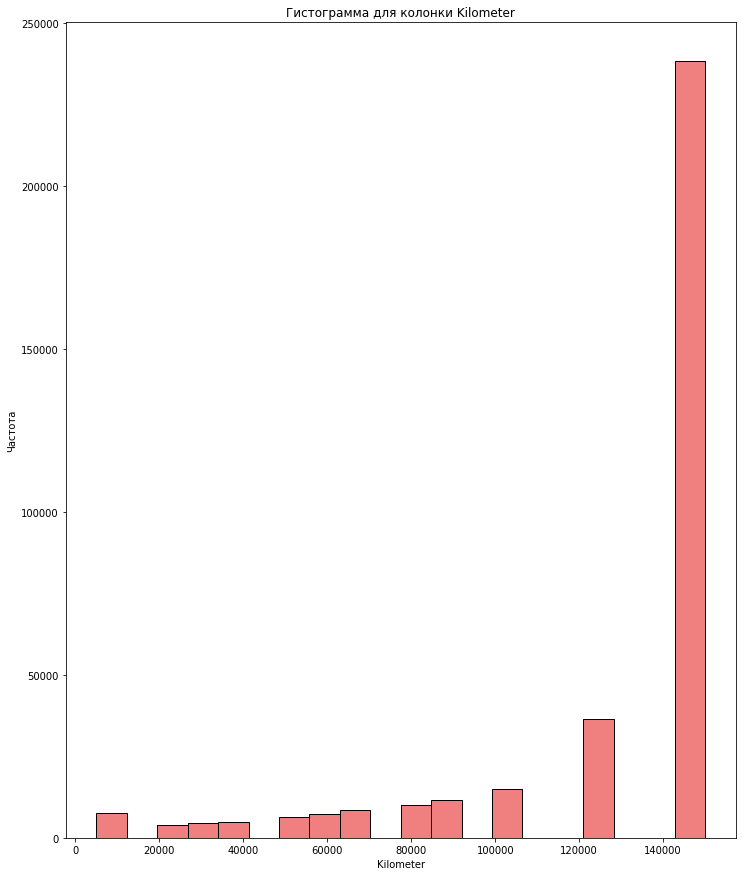

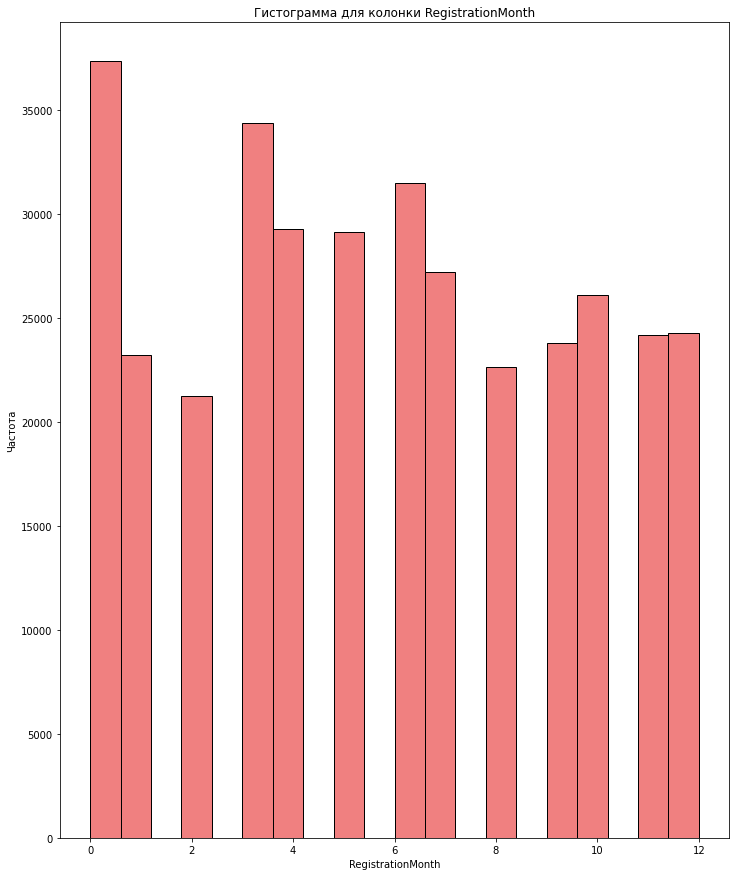

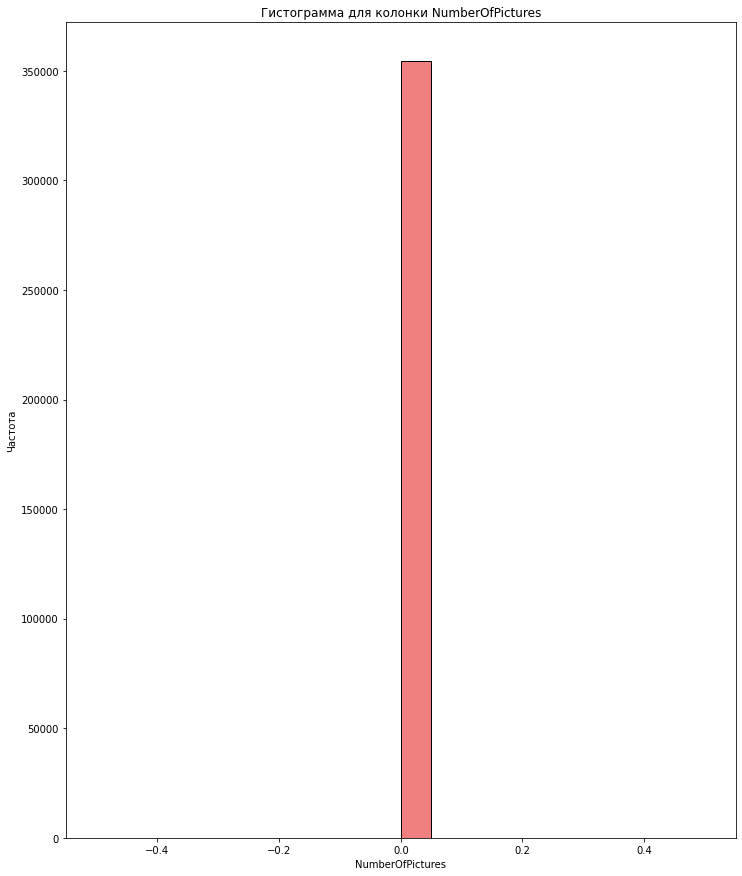

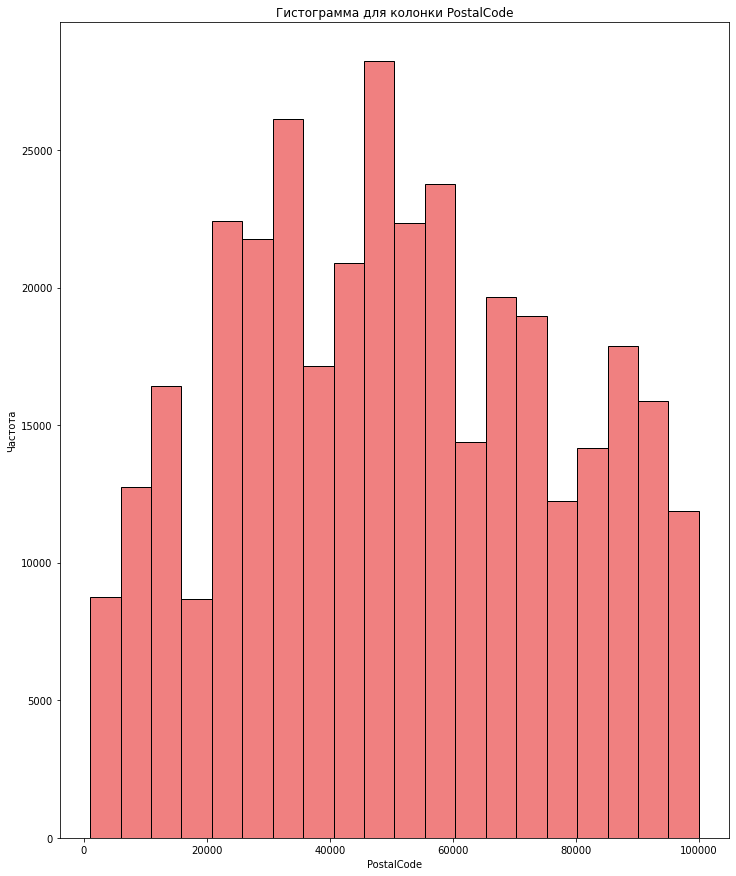

In [6]:
info_about_df(df)

In [7]:
def object_info(column):
    plt.figure(figsize=(15, 14))
    sns.countplot(data=df, x=column, color='skyblue')
    plt.title(f'Барплот для колонки {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

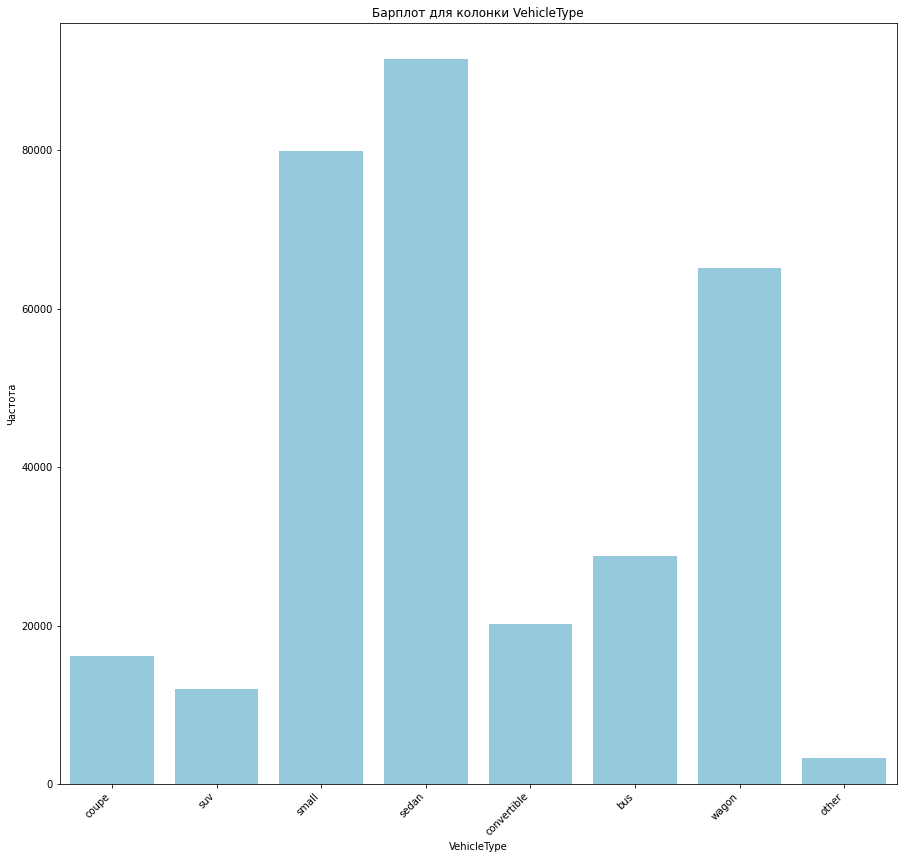

In [9]:
object_info('VehicleType')

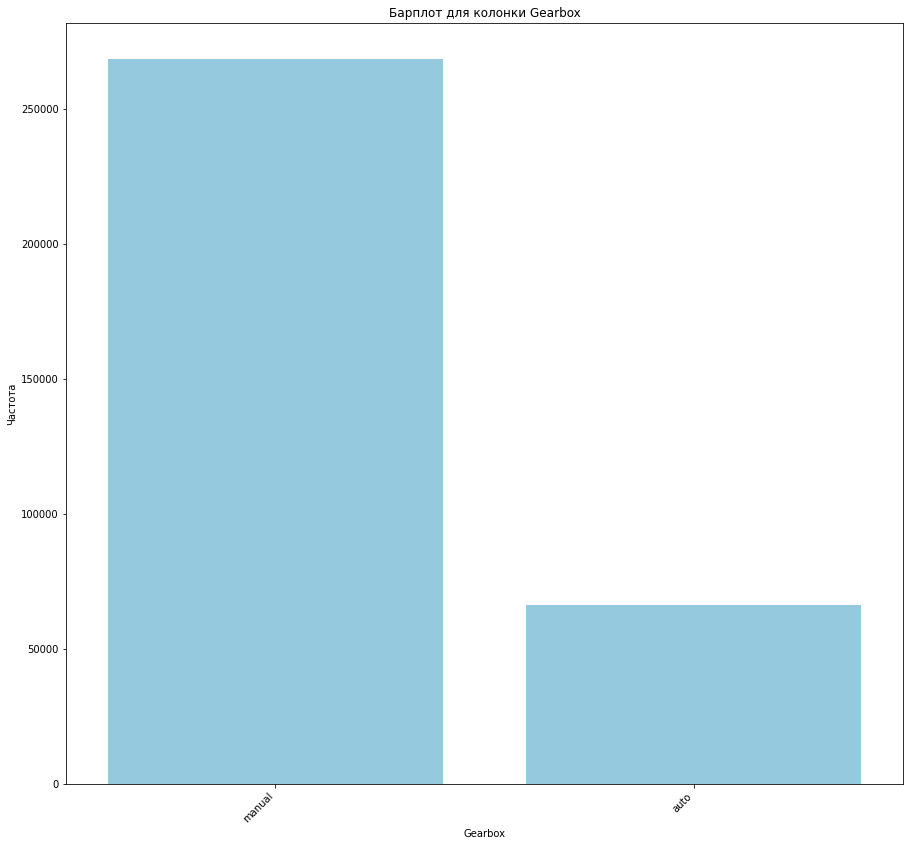

In [10]:
object_info('Gearbox')

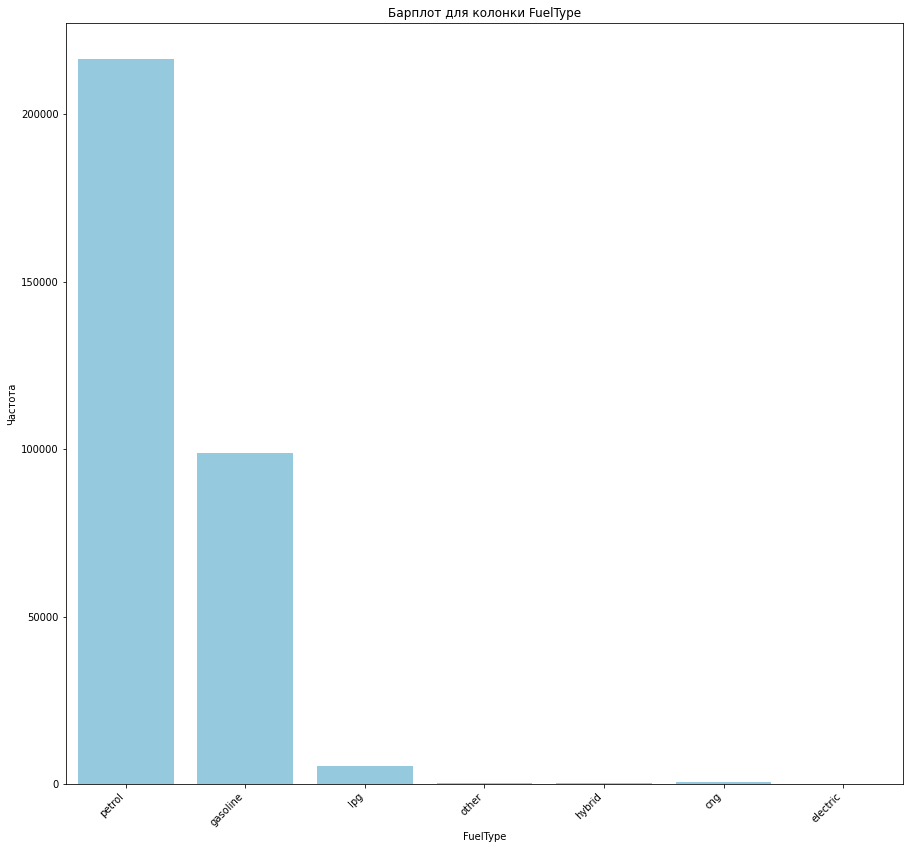

In [11]:
object_info('FuelType')

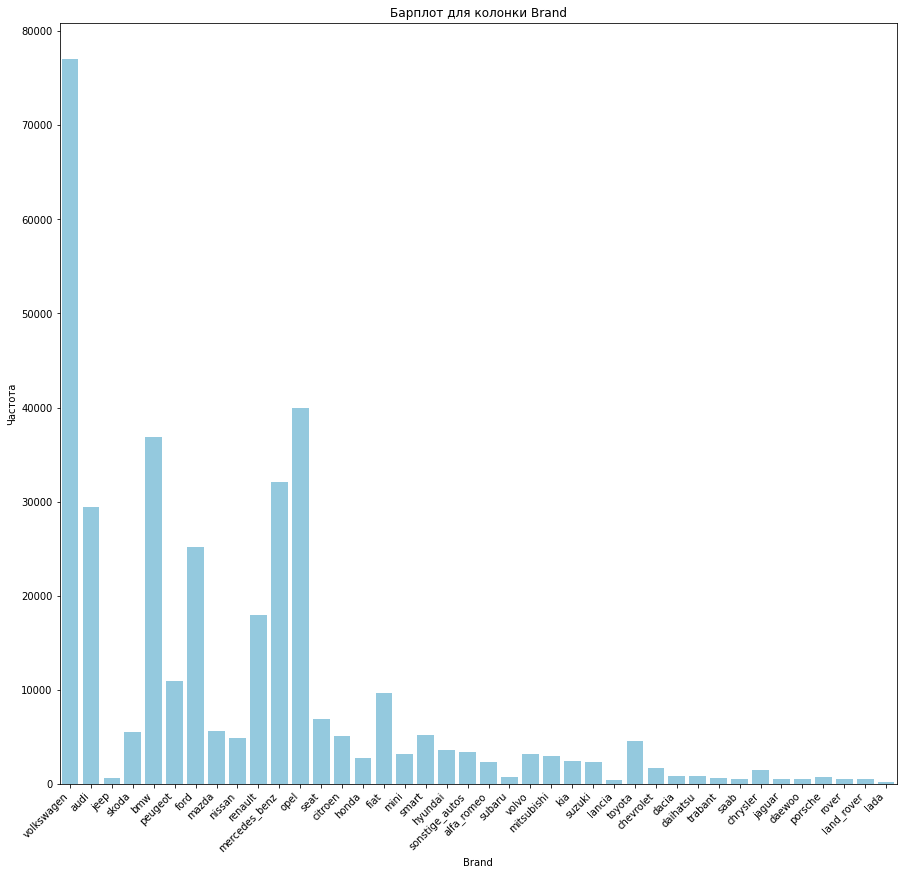

In [12]:
object_info('Brand')

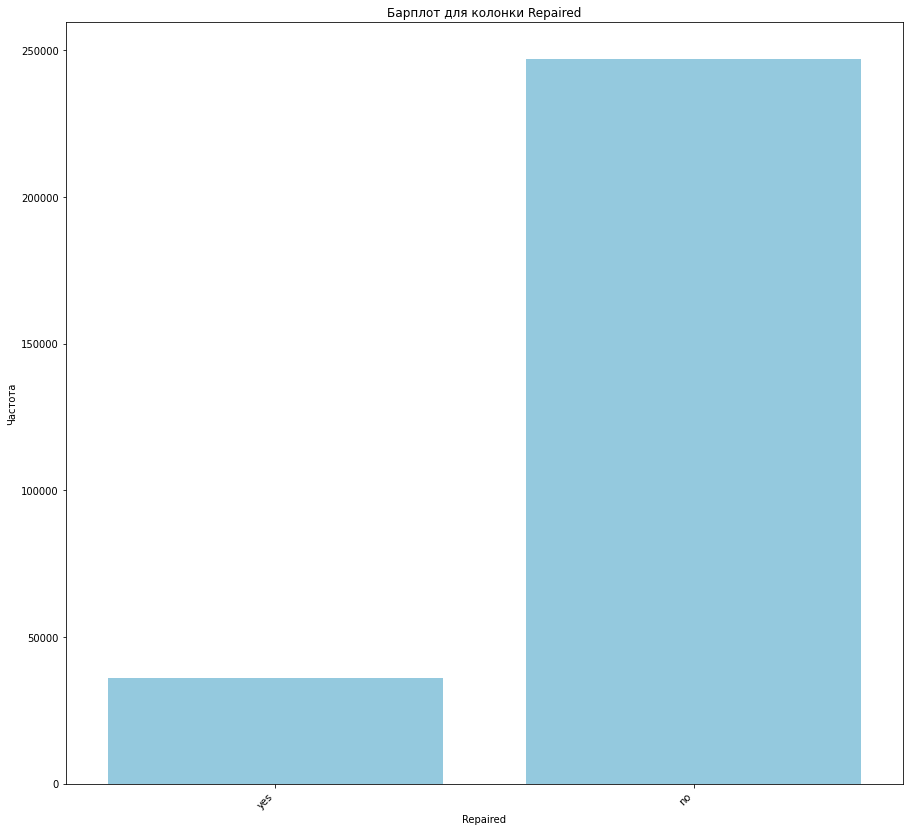

In [13]:
object_info('Repaired')

**Итоги предварительного анализа:**

1. Некоторые пользователи не указали тип кузова. Для дальнейшей работы будут пропуски заменены на Самый попуярный - седан. 
2. Не хватает данных по типу топлива у некоторых машин. Для дальейшей работы будут заменены самым используемым типом топлива - Petrol
3. Есть пропуски в моделях автомобилей. Это важный показатель, поэтому строки с пропусками будут удалены
4. Также мало данных в признаке, отражающим была ли машина в ремонте. Вероятнее всего люди не указывали данный показатель, когда заполняли анкету. если их машина не была в ремонте, поэтому пропуски мы заменим на no.
5. На гистограммах видны вбыросы в данных по колонкам: RegistrationYear, Poweк
6. NumberOfPictures имеет одни нули, поэтому эти данные мы уберём из итогового анализа

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

# Предобработка_данных

In [14]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [16]:
def columns_to_lowercase(df):
    df.columns = df.columns.str.lower()
    return df

In [17]:
df = columns_to_lowercase(df)

In [18]:
list_dublicate = df.columns
list_dublicate

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand',
       'repaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [19]:
def remove_duplicates(name, list_duplicate):
    print(name.duplicated(subset=list_duplicate).sum())
    name = name.drop_duplicates(subset=list_duplicate)
    return name

In [20]:
def anomaly(df):
    object_columns = df.select_dtypes(exclude='object').columns
    for column in object_columns:
        
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
        print(df[column].describe())

In [21]:
df = remove_duplicates(df, list_dublicate)

4


In [22]:
def year_column(datetime_column):

    return datetime_column.dt.year

In [23]:
df['datecrawled'].unique()

array(['2016-03-24 11:52:17', '2016-03-24 10:58:45',
       '2016-03-14 12:52:21', ..., '2016-03-21 09:50:58',
       '2016-03-14 17:48:27', '2016-03-19 18:57:12'], dtype=object)

In [24]:
df[['datecrawled','datecreated', 'lastseen']] = df[['datecrawled','datecreated', 'lastseen']].apply(pd.to_datetime)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        354365 non-null  datetime64[ns]
 1   price              354365 non-null  int64         
 2   vehicletype        316875 non-null  object        
 3   registrationyear   354365 non-null  int64         
 4   gearbox            334532 non-null  object        
 5   power              354365 non-null  int64         
 6   model              334660 non-null  object        
 7   kilometer          354365 non-null  int64         
 8   registrationmonth  354365 non-null  int64         
 9   fueltype           321470 non-null  object        
 10  brand              354365 non-null  object        
 11  repaired           283211 non-null  object        
 12  datecreated        354365 non-null  datetime64[ns]
 13  numberofpictures   354365 non-null  int64   

In [26]:
df['datecrawled'] = year_column(df['datecrawled'])
df['datecreated'] = year_column(df['datecreated'])
df['lastseen'] = year_column(df['lastseen'])

In [27]:
df['registrationmonth'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

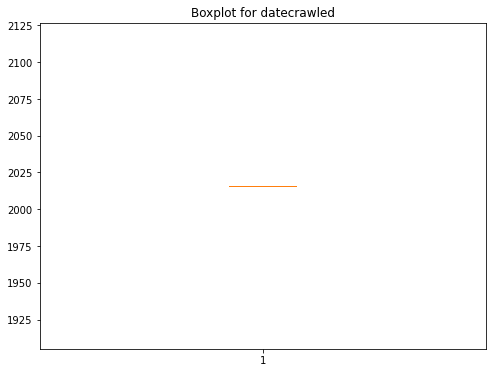

count    354365.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: datecrawled, dtype: float64


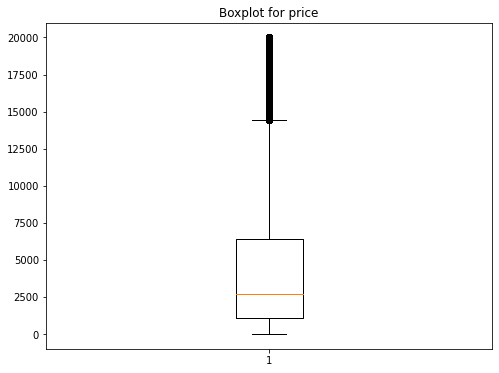

count    354365.000000
mean       4416.679830
std        4514.176349
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64


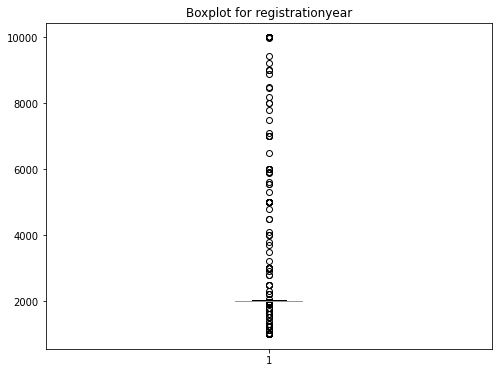

count    354365.000000
mean       2004.234481
std          90.228466
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registrationyear, dtype: float64


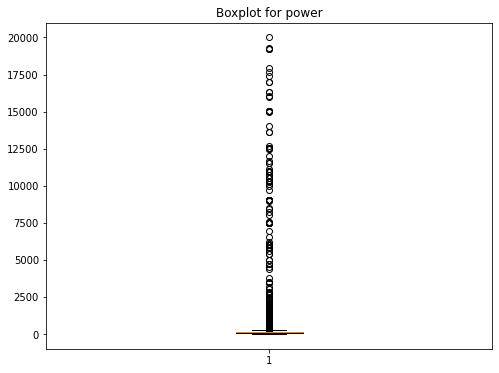

count    354365.000000
mean        110.093816
std         189.851330
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64


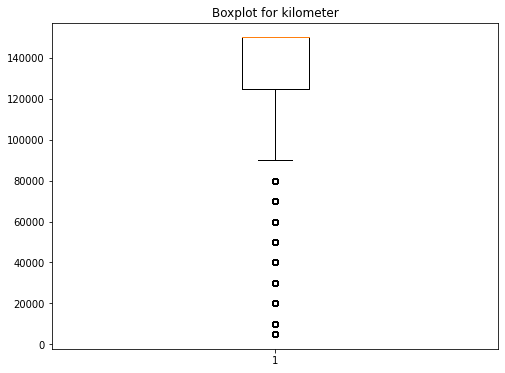

count    354365.000000
mean     128211.363989
std       37905.083858
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64


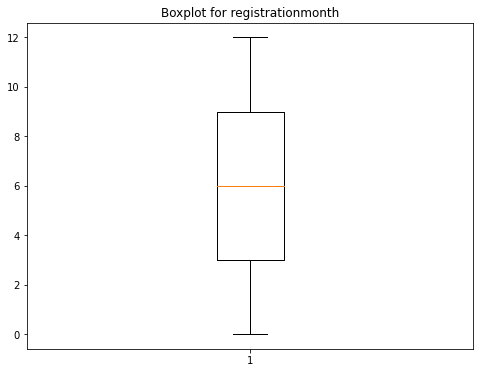

count    354365.000000
mean          5.714650
std           3.726432
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registrationmonth, dtype: float64


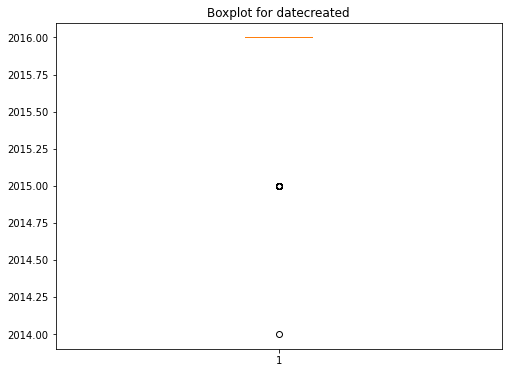

count    354365.000000
mean       2015.999924
std           0.009046
min        2014.000000
25%        2016.000000
50%        2016.000000
75%        2016.000000
max        2016.000000
Name: datecreated, dtype: float64


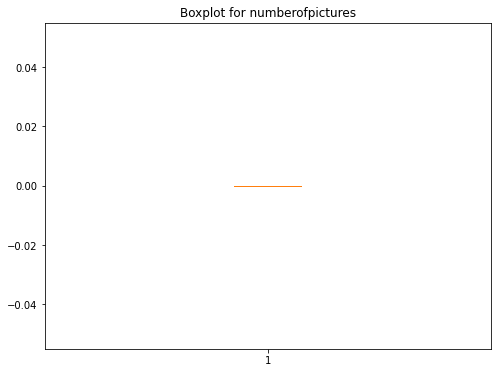

count    354365.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: numberofpictures, dtype: float64


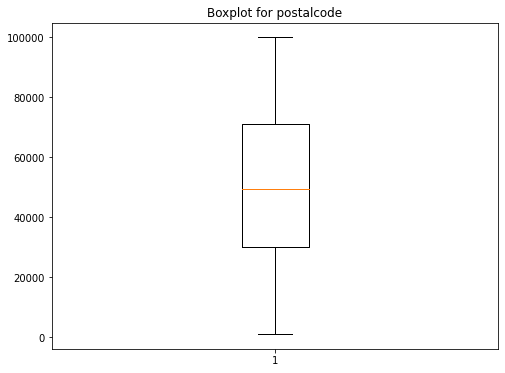

count    354365.000000
mean      50508.503800
std       25783.100078
min        1067.000000
25%       30165.000000
50%       49413.000000
75%       71083.000000
max       99998.000000
Name: postalcode, dtype: float64


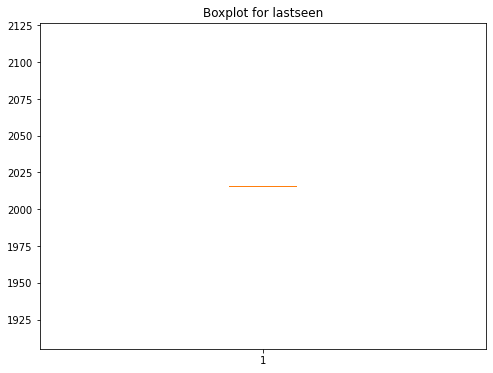

count    354365.0
mean       2016.0
std           0.0
min        2016.0
25%        2016.0
50%        2016.0
75%        2016.0
max        2016.0
Name: lastseen, dtype: float64


In [28]:
anomaly(df)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354365 non-null  int64 
 1   price              354365 non-null  int64 
 2   vehicletype        316875 non-null  object
 3   registrationyear   354365 non-null  int64 
 4   gearbox            334532 non-null  object
 5   power              354365 non-null  int64 
 6   model              334660 non-null  object
 7   kilometer          354365 non-null  int64 
 8   registrationmonth  354365 non-null  int64 
 9   fueltype           321470 non-null  object
 10  brand              354365 non-null  object
 11  repaired           283211 non-null  object
 12  datecreated        354365 non-null  int64 
 13  numberofpictures   354365 non-null  int64 
 14  postalcode         354365 non-null  int64 
 15  lastseen           354365 non-null  int64 
dtypes: int64(10), object

In [30]:
quantile_5th = st.mstats.mquantiles(df['price'], 0.05)
quantile_5th

array([200.])

In [31]:
df = df.drop(['datecrawled', 'datecreated', 'lastseen'], axis=1)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Выбросить машину в Германии удовольствие не из дешёвых, я бы не считал дешёвые машины аномалией ))</font>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Удалил обрезку
    </font>
</div>

In [32]:
df = df[df['registrationyear'] > 1960]
df = df[df['registrationyear'] <2024]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353650 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              353650 non-null  int64 
 1   vehicletype        316525 non-null  object
 2   registrationyear   353650 non-null  int64 
 3   gearbox            334200 non-null  object
 4   power              353650 non-null  int64 
 5   model              334271 non-null  object
 6   kilometer          353650 non-null  int64 
 7   registrationmonth  353650 non-null  int64 
 8   fueltype           321104 non-null  object
 9   brand              353650 non-null  object
 10  repaired           282951 non-null  object
 11  numberofpictures   353650 non-null  int64 
 12  postalcode         353650 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 37.8+ MB


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Обрати внимание на даты в DateCrawled в сравнении с RegistrationYear</font>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Не очень понимаю суть данного комментария. Я это делал ранее. При том со всеми столбцами с датами. Они все оказались одного года, одного месяца и разве что дни разные. DateCrawled и остальные даты кроме года регистрации авто на матрице показали около 0 корреляцию, поэтому я их удалил. Ну и это логично, так как дата получения данных анкеты из бд уж точно никак не повлияет на цену. Поэтому подобные параметры были удалены выше командой. Никаких причин оставлять данный столбец я не вижу. Или тут вопрос в том, почему я удалили без исследвания? Там все пользователи почти в одни даты последний раз заходили, регестрировались и их анкеты были добыты из баps данных
</div>

In [33]:
df = df[df['power'] < 1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353353 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              353353 non-null  int64 
 1   vehicletype        316265 non-null  object
 2   registrationyear   353353 non-null  int64 
 3   gearbox            333916 non-null  object
 4   power              353353 non-null  int64 
 5   model              334008 non-null  object
 6   kilometer          353353 non-null  int64 
 7   registrationmonth  353353 non-null  int64 
 8   fueltype           320861 non-null  object
 9   brand              353353 non-null  object
 10  repaired           282758 non-null  object
 11  numberofpictures   353353 non-null  int64 
 12  postalcode         353353 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 37.7+ MB


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [34]:
df = df.drop('numberofpictures', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353353 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              353353 non-null  int64 
 1   vehicletype        316265 non-null  object
 2   registrationyear   353353 non-null  int64 
 3   gearbox            333916 non-null  object
 4   power              353353 non-null  int64 
 5   model              334008 non-null  object
 6   kilometer          353353 non-null  int64 
 7   registrationmonth  353353 non-null  int64 
 8   fueltype           320861 non-null  object
 9   brand              353353 non-null  object
 10  repaired           282758 non-null  object
 11  postalcode         353353 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 35.0+ MB


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [35]:
def count_missing_values(df):

    missing_values = df.isna().sum()
    return missing_values[missing_values > 0]

In [36]:
count_missing_values(df)

vehicletype    37088
gearbox        19437
model          19345
fueltype       32492
repaired       70595
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353353 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              353353 non-null  int64 
 1   vehicletype        316265 non-null  object
 2   registrationyear   353353 non-null  int64 
 3   gearbox            333916 non-null  object
 4   power              353353 non-null  int64 
 5   model              334008 non-null  object
 6   kilometer          353353 non-null  int64 
 7   registrationmonth  353353 non-null  int64 
 8   fueltype           320861 non-null  object
 9   brand              353353 non-null  object
 10  repaired           282758 non-null  object
 11  postalcode         353353 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 35.0+ MB


In [38]:
df['vehicletype'] = df['vehicletype'].fillna(df['vehicletype'].mode()[0])
df['repaired'] = df['repaired'].fillna(df['repaired'].mode()[0])
df['fueltype'] = df['fueltype'].fillna(df['fueltype'].mode()[0])
df['gearbox'] = df['gearbox'].fillna(df['gearbox'].mode()[0])


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены достаточно безопасно.
</font>

In [39]:
df = df.dropna()

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Слишком большая потеря данных, нужно заполнить.</font>
```
2. Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. 
```

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
заемнил модой. Но столбцы с пропусками модели я решил удалить. ВО-первых потеря данных уже не будет такой большой, во-вторых самих категорий модели 250, поэтому при замене модой они могут испортить обучение
    </font>
</div>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334008 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              334008 non-null  int64 
 1   vehicletype        334008 non-null  object
 2   registrationyear   334008 non-null  int64 
 3   gearbox            334008 non-null  object
 4   power              334008 non-null  int64 
 5   model              334008 non-null  object
 6   kilometer          334008 non-null  int64 
 7   registrationmonth  334008 non-null  int64 
 8   fueltype           334008 non-null  object
 9   brand              334008 non-null  object
 10  repaired           334008 non-null  object
 11  postalcode         334008 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 33.1+ MB


In [41]:
list_dublicate = df.columns
df = remove_duplicates(df, list_dublicate)

23979


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310029 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              310029 non-null  int64 
 1   vehicletype        310029 non-null  object
 2   registrationyear   310029 non-null  int64 
 3   gearbox            310029 non-null  object
 4   power              310029 non-null  int64 
 5   model              310029 non-null  object
 6   kilometer          310029 non-null  int64 
 7   registrationmonth  310029 non-null  int64 
 8   fueltype           310029 non-null  object
 9   brand              310029 non-null  object
 10  repaired           310029 non-null  object
 11  postalcode         310029 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 30.7+ MB


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>Так как мы удалили часть признаков, у нас могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. При этом ценности для модели такие наблюдения уже не принесут, поэтому стоит проверить дубликаты также в финальной версии таблицы.</font>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Действительно много дубликатов. Очень ценный совет
    </font>
</div>

**Результаты предобработки:**
1. Удалены явные дубликаты
2. В столбце price были необычные предлоения по продаже за 0 евро. Для исключения данных, которые могут плохо повлиять на качество обучения модели они были убраны до 5% квантиля.
3. В столбце по дате регистрации автомобиля были мшаины. зарегестрирвоанные в 1000 годы при крестоносцах и настояющие дэлорианы докторы Брауна из 9999 года. Для более качественной настройки модели взяты данные с 1900 по 2024 год
4. В даных оказались аномально высокие показатели мощности двигатели. Вероятно продавцы случайно добавляли несколько нулей. В рамках предобработки были удалены автомобили с мощностью более 1000 л.с
5. Данные о пробеге столкнулись с явным лимитом вводимых значений, поэтому для дальнейшей работы будет создана категориальная перемнная, состоящая из "более 15000 км" и "менее 15000 км". Старые данные удалены не будут, вместо этого будет проведено исследование, какой из вариантов даст большую точность для модели. 
6. Столбец с количеством фотографий пуст. Удаляем его. 
7. Данные о дате скачивания анкеты, последнем посещении владельца анкеты и дате регитсрации анкеты почти одинаковые и не нужны lzk дальнейшего анализа. Удалим их. 
8. Обработаны пропуски

# Исследовательский_анализ_данных

In [43]:
def histagramma(m, name):
    counts = m[f'{name}']
    print(counts.describe())
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(np.median(counts), color='red',
                linestyle='dashed', linewidth=2, label='Медиана')
    plt.axvline(np.mean(counts), color='green',
                linestyle='dashed', linewidth=2, label='Среднее')
    plt.axvline(np.percentile(counts, 25), 
                color='orange', linestyle='dashed', linewidth=2, label='1-й квартиль')
    plt.axvline(np.percentile(counts, 75),
                color='blue', linestyle='dashed', linewidth=2, label='3-й квартиль')
        
    plt.legend()

    plt.title(f'{name}')
    plt.xlabel(f'Значения')
    plt.ylabel('Частота')
    plt.show()

In [44]:

def barplot(dataframe, column_name):

    value_counts = dataframe[column_name].value_counts()

    percentages = (value_counts / value_counts.sum() * 100).round(2)
    

    results_table = pd.DataFrame({
        'Количество': value_counts,
        'Проценты': percentages
    })

    print(f'Результаты подсчёта для столбца "{column_name}":')
    print(results_table)
    print("\n")  
    plt.figure(figsize=(10, 6))
    bars = value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Барплот для столбца "{column_name}"')
    plt.xlabel(column_name)
    plt.ylabel('Количество')
    
 
    for bar, percentage in zip(bars.patches, percentages):
        y = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        bars.annotate(f'{percentage}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.show()


In [45]:
def pie(df, param):
    breed_counts = df[f'{param}'].value_counts()
    print(breed_counts)
    plt.pie(breed_counts, labels=breed_counts.index, autopct='%1.1f%%', startangle=140)

    plt.title(f'Круговая диаграмма распределения для показателя {param}')


    plt.show()

In [46]:
def mean_target(df, param, target):
    mean_target_by_param = df.groupby(param)[target].mean().reset_index()

    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x=param, y=target, data=mean_target_by_param)
    plt.title(f'Average {target} by {param}')
    plt.xlabel(param)
    plt.ylabel(f'Average {target}')

    # Добавление подписей значений над каждым столбцом
    for index, value in enumerate(mean_target_by_param[target]):
        barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

    plt.show()

In [47]:
def mean_target(df, param, target):
    # Группировка и расчет среднего, сброс индекса для облегчения сортировки
    mean_target_by_param = df.groupby(param)[target].mean().reset_index()
    
    # Сортировка значений по целевому столбцу
    mean_target_by_param = mean_target_by_param.sort_values(by=target, ascending=False)

    # Вывод группировки в виде таблицы
    print("Таблица средних значений:")
    print(mean_target_by_param)
    
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x=param, y=target, data=mean_target_by_param)
    plt.title(f'Average {target} by {param}')
    plt.xlabel(param)
    plt.ylabel(f'Average {target}')
    
    # Вертикальное разворачивание подписей
    plt.xticks(rotation=90)  # Поворот подписей на оси X на 90 градусов

    # Добавление подписей значений над каждым столбцом
    for index, value in enumerate(mean_target_by_param[target]):
        barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

    plt.tight_layout()  # Автоматическое корректирование подписей, меток и т.д. для их лучшего отображения
    plt.show()



In [48]:
def link(df, name, target):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df[f'{name}'], y=df[f'{target}'], data=df)
    plt.title(f'Scatter Plot для {name} и {target}')
    plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310029 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              310029 non-null  int64 
 1   vehicletype        310029 non-null  object
 2   registrationyear   310029 non-null  int64 
 3   gearbox            310029 non-null  object
 4   power              310029 non-null  int64 
 5   model              310029 non-null  object
 6   kilometer          310029 non-null  int64 
 7   registrationmonth  310029 non-null  int64 
 8   fueltype           310029 non-null  object
 9   brand              310029 non-null  object
 10  repaired           310029 non-null  object
 11  postalcode         310029 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 30.7+ MB


In [50]:
hist_list = ['price', 'registrationyear', 'power', 'kilometer', 'registrationmonth', 'postalcode']
pie_list = ['repaired','gearbox']
mean_list = ['vehicletype', 'brand', 'repaired', 'fueltype', 'gearbox']

count    310029.000000
mean       4469.580997
std        4524.300396
min           0.000000
25%        1100.000000
50%        2800.000000
75%        6499.000000
max       20000.000000
Name: price, dtype: float64


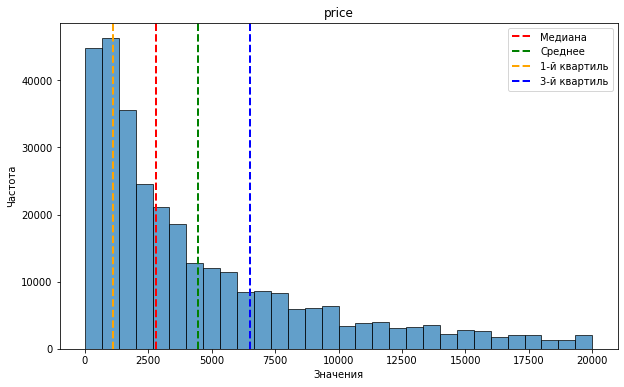

count    310029.000000
mean       2003.215473
std           6.993478
min        1961.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2019.000000
Name: registrationyear, dtype: float64


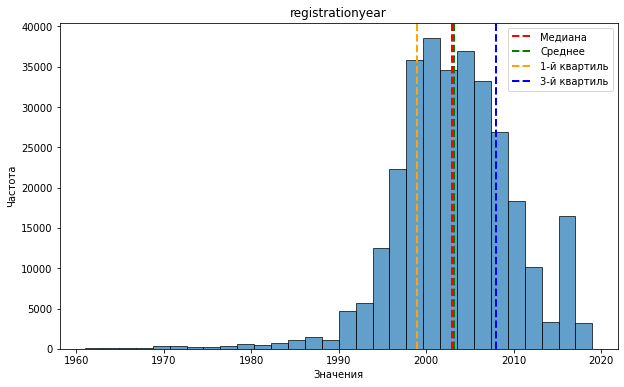

count    310029.000000
mean        107.693571
std          63.069794
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max         999.000000
Name: power, dtype: float64


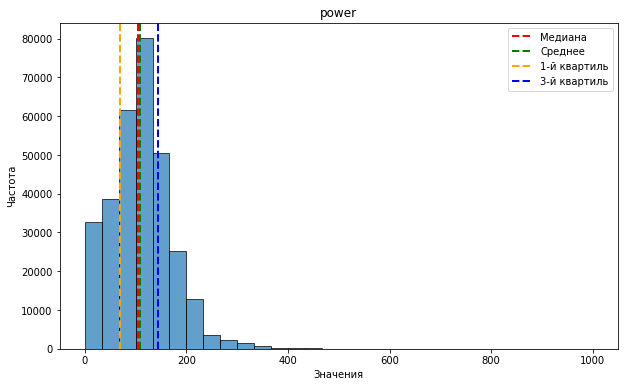

count    310029.000000
mean     128728.489915
std       37092.622308
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64


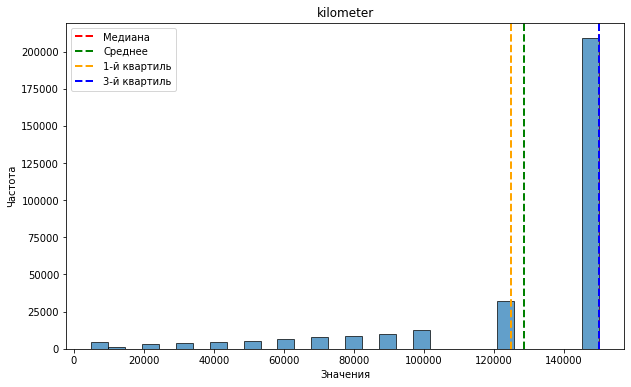

count    310029.000000
mean          5.786191
std           3.690143
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registrationmonth, dtype: float64


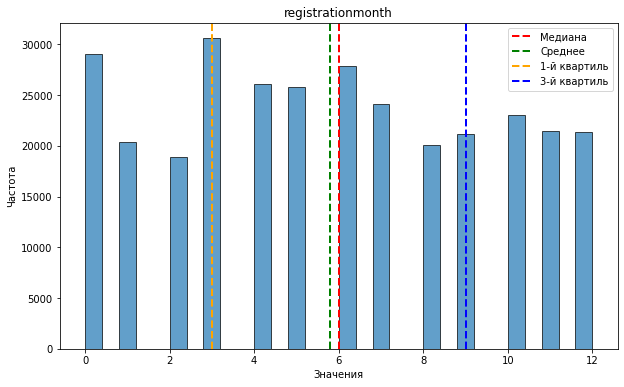

count    310029.000000
mean      50879.107467
std       25775.474770
min        1067.000000
25%       30519.000000
50%       49635.000000
75%       71634.000000
max       99998.000000
Name: postalcode, dtype: float64


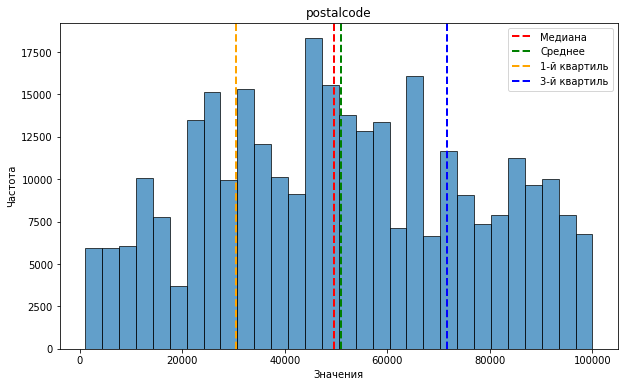

In [51]:
for i in hist_list:
    histagramma(df, i)

no     277831
yes     32198
Name: repaired, dtype: int64


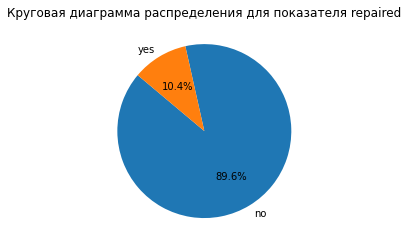

manual    251925
auto       58104
Name: gearbox, dtype: int64


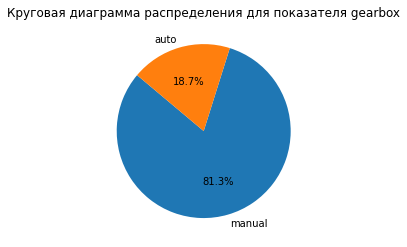

In [52]:
for i in pie_list:
    pie(df, i)

In [53]:
df['model'].value_counts()

golf                  27033
other                 22960
3er                   18267
polo                  12136
corsa                 11576
                      ...  
serie_2                   7
rangerover                4
serie_3                   4
serie_1                   2
range_rover_evoque        1
Name: model, Length: 250, dtype: int64

Результаты подсчёта для столбца "vehicletype":
             Количество  Проценты
sedan            110458     35.63
small             70688     22.80
wagon             58054     18.73
bus               25853      8.34
convertible       17826      5.75
coupe             14217      4.59
suv               10256      3.31
other              2677      0.86




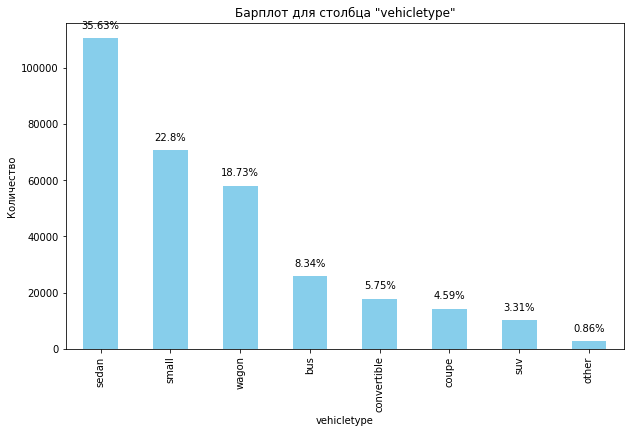

Результаты подсчёта для столбца "brand":
               Количество  Проценты
volkswagen          67867     21.89
opel                35108     11.32
bmw                 32224     10.39
mercedes_benz       28696      9.26
audi                26069      8.41
ford                22424      7.23
renault             16005      5.16
peugeot              9315      3.00
fiat                 8488      2.74
seat                 6173      1.99
skoda                4933      1.59
mazda                4914      1.59
smart                4682      1.51
citroen              4582      1.48
nissan               4418      1.43
toyota               4185      1.35
hyundai              3125      1.01
mini                 2886      0.93
volvo                2834      0.91
mitsubishi           2706      0.87
honda                2519      0.81
kia                  2176      0.70
suzuki               2044      0.66
alfa_romeo           2036      0.66
chevrolet            1516      0.49
chrysler             12

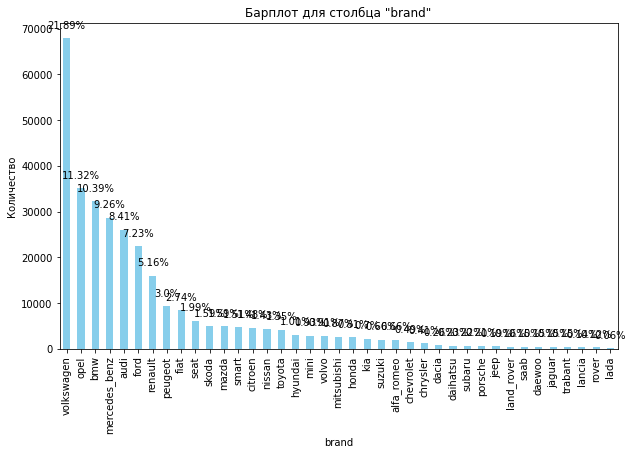

Результаты подсчёта для столбца "fueltype":
          Количество  Проценты
petrol        216201     69.74
gasoline       88353     28.50
lpg             4572      1.47
cng              508      0.16
hybrid           202      0.07
other            128      0.04
electric          65      0.02




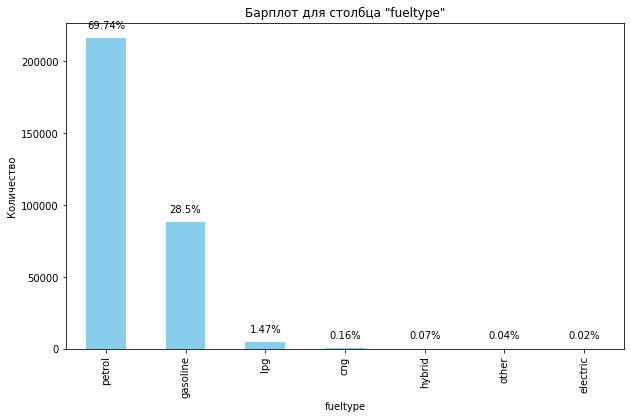

In [54]:
for i in ['vehicletype', 'brand', 'fueltype']:
    barplot(df, i)

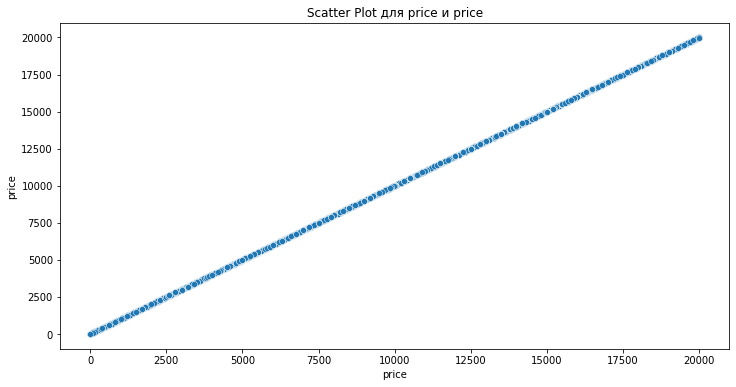

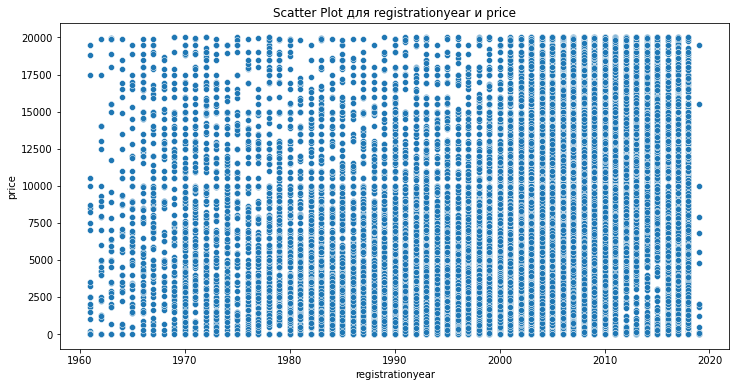

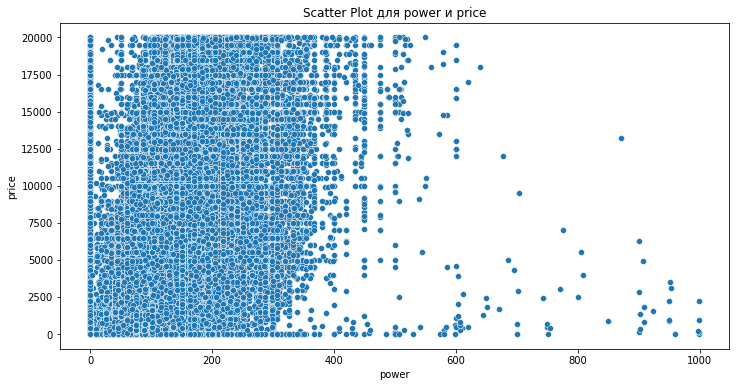

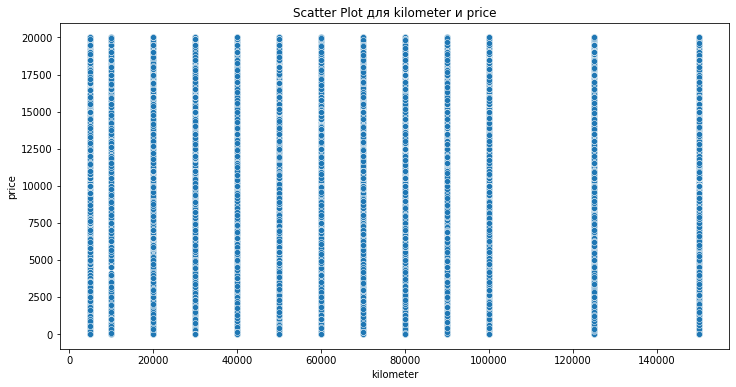

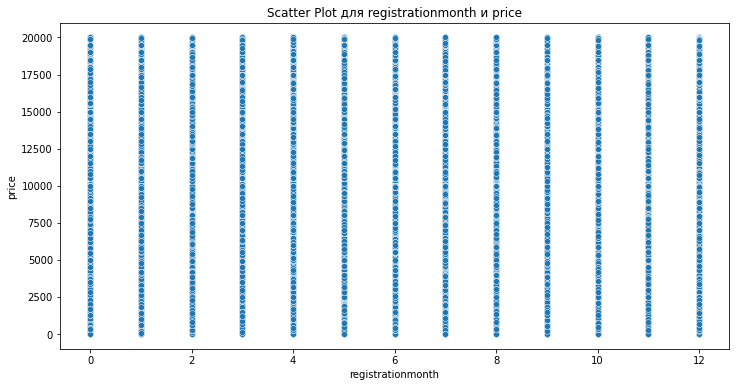

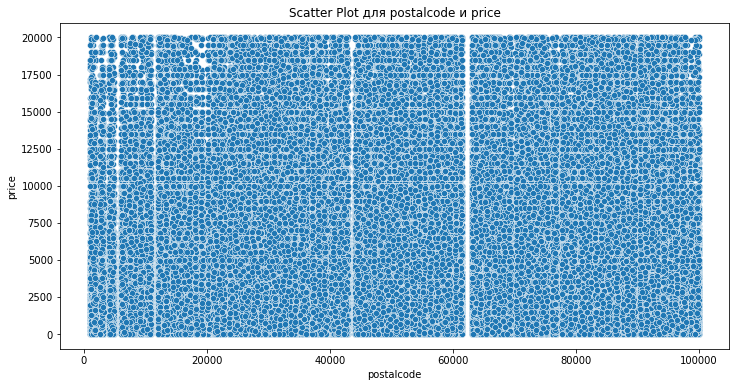

In [55]:
for i in hist_list:
    link(df, i, 'price')

Таблица средних значений:
   vehicletype        price
6          suv  8997.830148
1  convertible  6877.553349
2        coupe  6038.687698
0          bus  5498.185124
7        wagon  4909.017484
4        sedan  4135.250231
3        other  3571.095256
5        small  2709.126287


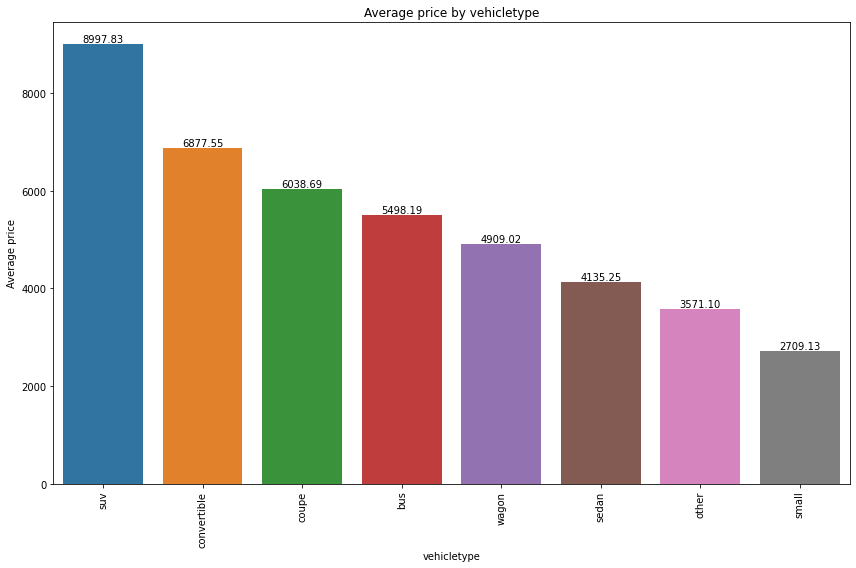

Таблица средних значений:
            brand         price
26        porsche  11477.181269
21           mini   8991.922384
18     land_rover   8406.212851
14           jeep   7096.509151
13         jaguar   6681.696970
1            audi   6323.522651
2             bmw   6266.172790
31          skoda   5960.509224
20  mercedes_benz   5927.303596
6           dacia   5891.495674
3       chevrolet   5667.888522
12        hyundai   5262.536000
15            kia   5136.630515
35         toyota   4801.553883
37     volkswagen   4448.417287
38          volvo   4267.546930
23         nissan   4143.372567
30           seat   4027.771910
34         suzuki   3900.668297
0      alfa_romeo   3807.569253
33         subaru   3781.907895
19          mazda   3737.769434
11          honda   3726.962287
29           saab   3717.833333
4        chrysler   3708.072884
32          smart   3547.086501
5         citroen   3527.552161
25        peugeot   3200.260440
10           ford   3186.233188
16           l

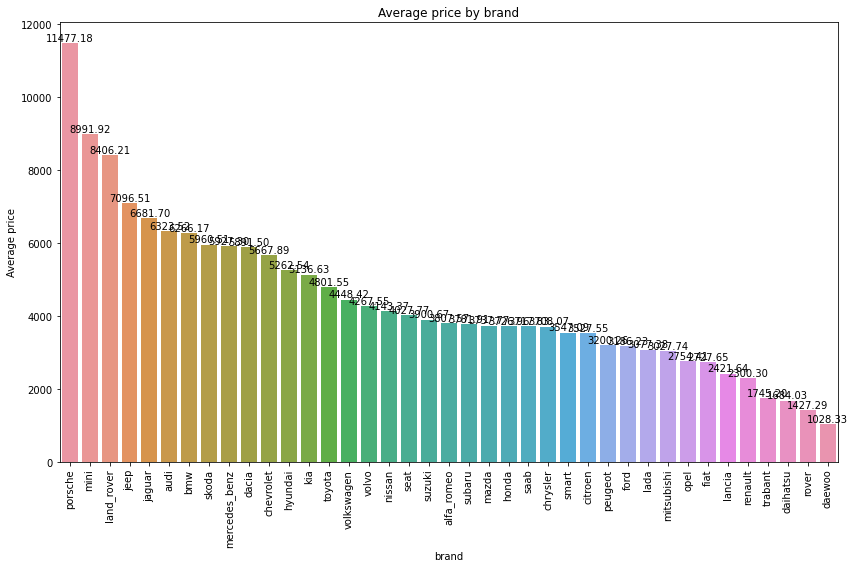

Таблица средних значений:
  repaired        price
0       no  4761.240920
1      yes  1952.897727


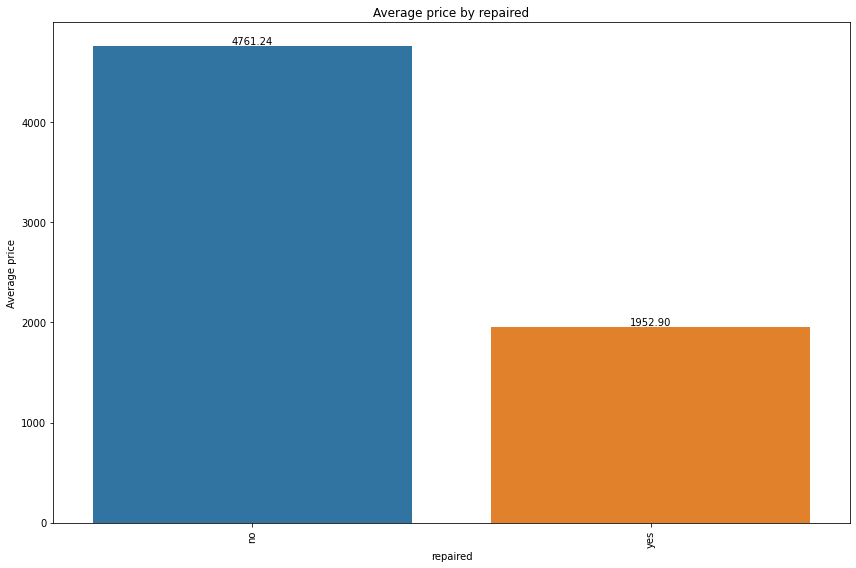

Таблица средних значений:
   fueltype        price
3    hybrid  9232.579208
1  electric  7272.015385
2  gasoline  6574.509819
0       cng  4380.761811
4       lpg  3933.995188
6    petrol  3616.754002
5     other  2554.015625


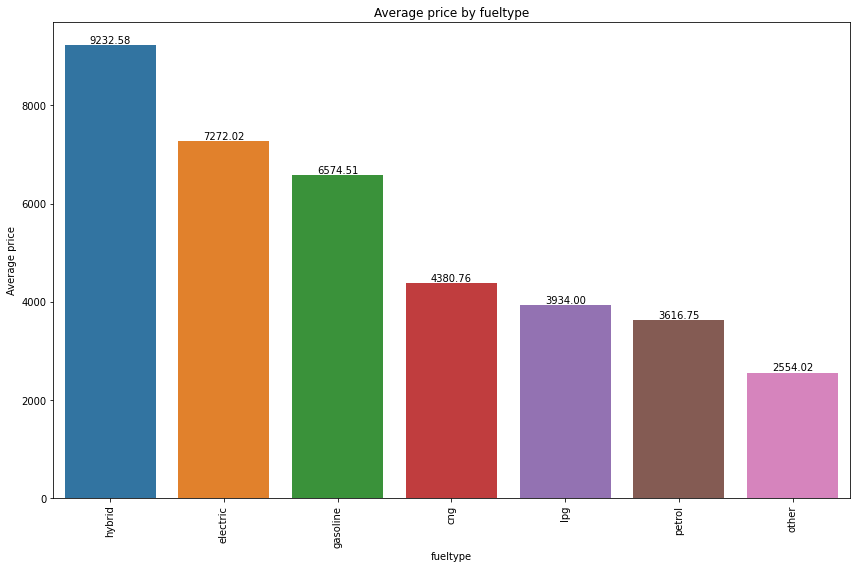

Таблица средних значений:
  gearbox        price
0    auto  6834.838204
1  manual  3924.057906


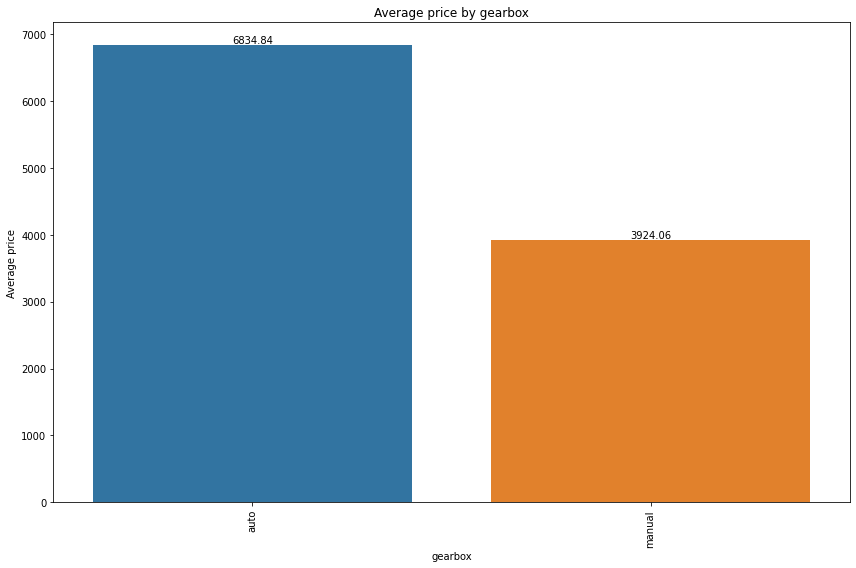

In [56]:
for i in mean_list:
    mean_target(df, i, 'price')

In [57]:
numeric_columns = df.select_dtypes(include=['number']).columns

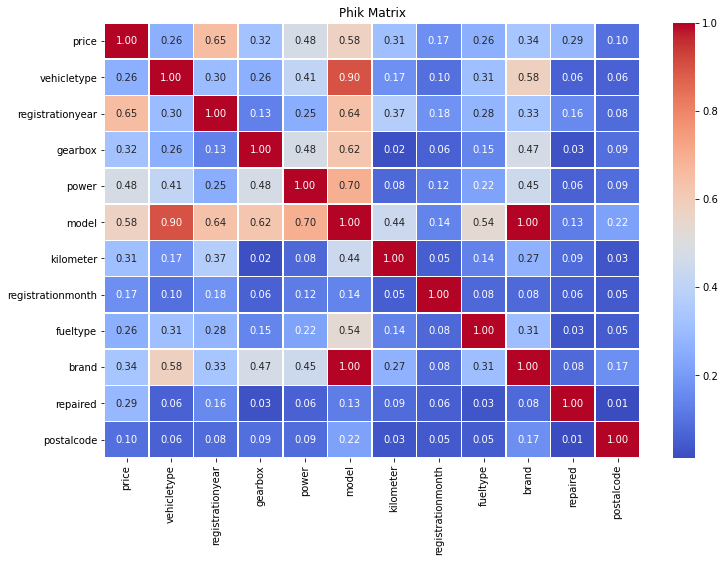

In [61]:
phik_matrix = df.phik_matrix(interval_cols = numeric_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Phik Matrix')
plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Обрати внимание, При использовании `phik` крайне важно настроить параметр `interval_cols`, передав ему список с названиями непрерывных признаков.</font>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Добавил
    </font>
</div>

**Выводы из исследовательского анализа:**

1. Большая часть автомобилей имеют цену ниже 5000 евро
2. Зарегетсрирвоанны автомобили преимущественно в первом десятилетии нашего века
3. Мощность двигателя у большинства автомобилей не превышает 200 л.с
4. Чаще всего пробег у предлоденных автомобилей больше 15000 км
5. Всего у 88% ручная коробка передач. У 11 % автоматическая
6. Наиболее встречающиеся типы кузова: sedan, small и wagon
7. Более 10% предложений имею фольсваген, бмв и опель. Немецкий автопром самый востребованный в Европе
8. Больша ячасть авто работают на бенине, небольшая часть на газе, все остальные типы топлива очень редко встречаются
9. Машины, зарегстрирвоанные до 2000 года имеют меньше дорогих предлодений, чем те, которые после 2000
10. Автомобили с мощностью двигателя до 100 л.с имеют меньше дорогих экземпляров,ч ем среди тех, у которых мощность выше 100
11. Автомобили с типами кузова: suv стоят больше всего. На втором месте с convertible, на третьем автобусные.
12. Порше, мини и лэндровер имеют наибольшую среднюю цену среди брэндов
13. Самыми дорогими автомоилями являются те, что имеют гибридный тип двигателя, на электричестве и газу.
14. Машины с автоматической коробкой передач стоят дороже, чем с ручным 
15. На стоимость машины достаточно заметно влияет год регистрации, её мощность, чем выше эти показатели, тем больше цена. Также чем меньше пробег, тем цена будет меньше
16. Также на стоимость оказывает влияние модель автомобиля

# Подготовка_данных

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310029 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              310029 non-null  int64 
 1   vehicletype        310029 non-null  object
 2   registrationyear   310029 non-null  int64 
 3   gearbox            310029 non-null  object
 4   power              310029 non-null  int64 
 5   model              310029 non-null  object
 6   kilometer          310029 non-null  int64 
 7   registrationmonth  310029 non-null  int64 
 8   fueltype           310029 non-null  object
 9   brand              310029 non-null  object
 10  repaired           310029 non-null  object
 11  postalcode         310029 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 30.7+ MB


In [63]:
model_counts = df['model'].value_counts()

# Нахождение значений, встречающихся менее 10 раз
values_to_remove = model_counts[model_counts < 10]

values_to_remove.index

Index(['kalina', 'i3', 'serie_2', 'rangerover', 'serie_3', 'serie_1',
       'range_rover_evoque'],
      dtype='object')

In [64]:
df = df[~df['model'].isin(values_to_remove.index)]


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309995 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              309995 non-null  int64 
 1   vehicletype        309995 non-null  object
 2   registrationyear   309995 non-null  int64 
 3   gearbox            309995 non-null  object
 4   power              309995 non-null  int64 
 5   model              309995 non-null  object
 6   kilometer          309995 non-null  int64 
 7   registrationmonth  309995 non-null  int64 
 8   fueltype           309995 non-null  object
 9   brand              309995 non-null  object
 10  repaired           309995 non-null  object
 11  postalcode         309995 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 30.7+ MB


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Обрати внимание на отступы. По стандарту должно быть 4 пробела. Такой код будет работать не везде.</font>

In [66]:
df.head()

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,postalcode
0,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,no,70435
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no,90480
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,33775


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309995 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              309995 non-null  int64 
 1   vehicletype        309995 non-null  object
 2   registrationyear   309995 non-null  int64 
 3   gearbox            309995 non-null  object
 4   power              309995 non-null  int64 
 5   model              309995 non-null  object
 6   kilometer          309995 non-null  int64 
 7   registrationmonth  309995 non-null  int64 
 8   fueltype           309995 non-null  object
 9   brand              309995 non-null  object
 10  repaired           309995 non-null  object
 11  postalcode         309995 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 30.7+ MB


In [68]:
non_object_columns = df.drop('price', axis=1).select_dtypes(include=['number']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [69]:
non_object_columns

Index(['registrationyear', 'power', 'kilometer', 'registrationmonth',
       'postalcode'],
      dtype='object')

In [70]:
object_columns

Index(['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired'], dtype='object')

In [71]:
X = df.drop(['price'], axis=1)
y = df['price']


In [72]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [73]:
def encoder_for(x, y):
    encoder  = OneHotEncoder(sparse=False)
    X_train_ohn = encoder.fit_transform(x[object_columns])
    X_test_ohn = encoder.transform(y[object_columns])
    encoder_col_names = encoder.get_feature_names()
    X_train_ohn = pd.DataFrame(X_train_ohn, columns=encoder_col_names)
    X_test_ohn = pd.DataFrame(X_test_ohn, columns=encoder_col_names)
    return X_train_ohn, X_test_ohn

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что закодированы только категории.</font>

In [74]:
def scaler_for(x, y):   
    scaler = StandardScaler()
    X_train_scall = scaler.fit_transform(x[non_object_columns])
    X_test_scall = scaler.transform(y[non_object_columns])
    X_train_scall = pd.DataFrame(X_train_scall, columns=non_object_columns)
    X_test_scall = pd.DataFrame(X_test_scall, columns=non_object_columns)
    return X_train_scall, X_test_scall

    

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично, что scaler был обучен только на тренировочной части данных!</font>

In [75]:
X_train_ohn, X_val_ohn = encoder_for(X_train, X_val)
X_train_scall, X_val_scall = scaler_for(X_train, X_val)
X_train_lr = pd.concat([X_train_ohn, X_train_scall], axis=1)
X_val_lr = pd.concat([X_val_ohn, X_val_scall], axis=1)

c:\Users\simuk\practicum\practicum_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Модель_регрессии

In [76]:
%%time
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)


Wall time: 36.6 s


LinearRegression()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Кодирование признаков соответсвует модели!</font>

In [77]:
%%time
predictions_lr = model_lr.predict(X_val_lr)

Wall time: 450 ms


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Отлично что время обучения и время работы моделей измерено отдельно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Тестовую выборку нужно оставить для финального тестирования Лучшей модели. Для выбора лучшей модели и подбора гиперпараметров нужна ещё одна выборка - валидационная. Именно по ней оцениваются предсказания на "конкурс моделей". Или можно использовать кроссвалидацию, там валидационная выборка генерится автоматически.</font>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Сделано
    </font>
</div>

In [78]:
mean_squared_error(y_val, predictions_lr, squared=False)

2776.9644584392486

# Модель_дерево_решений

In [79]:
def ordinal_encoder_for(x, y, ordinal_columns):
    encoder = OrdinalEncoder()

    X_train_encoded = encoder.fit_transform(x[ordinal_columns])
    X_test_encoded = encoder.transform(y[ordinal_columns])

    X_train_encoded = pd.DataFrame(X_train_encoded, columns=ordinal_columns, index=x.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=ordinal_columns, index=y.index)
    
    return X_train_encoded, X_test_encoded

In [80]:
X_train_ohn, X_val_ohn = ordinal_encoder_for(X_train, X_val, object_columns)
X_train_scall, X_val_scall = scaler_for(X_train, X_val)
X_train = pd.concat([X_train_ohn, X_train_scall], axis=1)
X_val = pd.concat([X_val_ohn, X_val_scall], axis=1)

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319049 entries, 0 to 354367
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vehicletype        247996 non-null  float64
 1   gearbox            247996 non-null  float64
 2   model              247996 non-null  float64
 3   fueltype           247996 non-null  float64
 4   brand              247996 non-null  float64
 5   repaired           247996 non-null  float64
 6   registrationyear   247996 non-null  float64
 7   power              247996 non-null  float64
 8   kilometer          247996 non-null  float64
 9   registrationmonth  247996 non-null  float64
 10  postalcode         247996 non-null  float64
dtypes: float64(11)
memory usage: 29.2 MB


In [91]:
X_train.dropna()

,vehicletype,gearbox,model,fueltype,brand,repaired,registrationyear,power,kilometer,registrationmonth,postalcode
2,6.0,0.0,117.0,2.0,14.0,0.0,0.255309,0.085070,0.572969,-0.212922,-1.341904
4,5.0,1.0,101.0,2.0,31.0,0.0,-1.175964,-0.152419,-3.335291,-1.568204,1.291561
5,4.0,1.0,11.0,6.0,2.0,1.0,-0.174073,-1.704012,0.572969,-1.568204,-0.638576
6,1.0,1.0,8.0,6.0,25.0,0.0,-0.317200,-0.627397,-0.100869,0.058134,0.118634
8,0.0,1.0,60.0,6.0,10.0,0.0,-0.030945,0.132568,0.572969,-1.568204,-0.904915
...,...,...,...,...,...,...,...,...,...,...,...
247987,2.0,0.0,164.0,2.0,20.0,0.0,1.400328,-0.754057,-3.335291,1.684471,-1.131969
247988,1.0,0.0,106.0,2.0,32.0,0.0,0.398436,-1.704012,0.572969,0.871302,-1.549665
247989,4.0,0.0,15.0,2.0,2.0,0.0,1.829709,-0.453238,0.572969,-0.755035,1.816709
247992,4.0,0.0,6.0,2.0,2.0,0.0,-0.603455,-1.704012,0.572969,-1.568204,-0.748667


In [92]:
%%time
model_tree = DecisionTreeRegressor(random_state=RANDOM_STATE)
model_tree.fit(X_train, y_train)


ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Модели основанные на деревьях (все модели в проекте кроме Линейной) могут работать с порядковым кодированием категорий (OrdinalEncoding). OHE сильно раздувает размерность данных, что сказывается на вычислительной нагрузке (времени).</font>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Но ведь ординал энкодер можно использовать, только когда у нас есть "порядковость". Ранги чего присваивать? Нельзя говорить, что кузов сдан важнее кузова вагон и так далее. так на каком основании давать ранги? Но я сделал, если что
    </font>
</div>

In [93]:
%%time
predictions_tree = model_tree.predict(X_val)


ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [94]:
mean_squared_error(y_val, predictions_tree, squared=False)

NameError: name 'predictions_tree' is not defined

In [ ]:
%%time
model_big_tree = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=30, min_samples_split=10, min_samples_leaf=12)
model_big_tree.fit(X_train, y_train)


CPU times: user 6.6 s, sys: 83.6 ms, total: 6.68 s
Wall time: 6.69 s


DecisionTreeRegressor(max_depth=30, min_samples_leaf=12, min_samples_split=10,
                      random_state=42)

In [ ]:
%%time
predictions_big_tree = model_big_tree.predict(X_val)


CPU times: user 84.6 ms, sys: 213 µs, total: 84.8 ms
Wall time: 92.6 ms


In [ ]:
mean_squared_error(y_val, predictions_big_tree, squared=False)

1798.0707206974885

# Модель_лассо

In [ ]:
%%time
model_lasso = Lasso(random_state=RANDOM_STATE)
model_lasso.fit(X_train, y_train)


CPU times: user 51.6 s, sys: 21 s, total: 1min 12s
Wall time: 1min 12s


Lasso(random_state=42)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Кодирование признаков соответсвует модели!</font>

In [ ]:
%%time
predictions_lasso = model_lasso.predict(X_val)


CPU times: user 99.9 ms, sys: 35.5 ms, total: 135 ms
Wall time: 192 ms


In [ ]:
mean_squared_error(y_val, predictions_lasso, squared=False)

2691.1177472472

# Модель_LightGBM

In [ ]:
%%time
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val, reference=train_data)


params = {
    'objective': 'regression',  # Задача регрессии
    'metric': 'rmse',  # Среднеквадратичная ошибка
    'boosting_type': 'gbdt',  # Градиентный бустинг
    'num_leaves': 31,  # Количество листьев в дереве
    'learning_rate': 0.05,  # Скорость обучения
}

# Обучите модель
num_round = 500  # Количество итераций
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1177
[LightGBM] [Info] Number of data points in the train set: 215958, number of used features: 295
[LightGBM] [Info] Start training from score 4915.221909
[1]	valid_0's rmse: 4413.98
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 4259.1
[3]	valid_0's rmse: 4113.55
[4]	valid_0's rmse: 3977.49
[5]	valid_0's rmse: 3850.6
[6]	valid_0's rmse: 3730.35
[7]	valid_0's rmse: 3618.58
[8]	valid_0's rmse: 3512.41
[9]	valid_0's rmse: 3413.3
[10]	valid_0's rmse: 3320.22
[11]	valid_0's rmse: 3234.31
[12]	valid_0's rmse: 3153.13
[13]	valid_0's rmse: 3075.26
[14]	valid_0's rmse: 3002.81
[15]	valid_0's rmse: 2936.17
[16]	valid_0's rmse: 2872.78
[17]	valid_0's rmse: 2813.87
[18]	valid_0's rmse: 2758.02
[19]	valid_0's 

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>LightGBM может работать с категориальными признаками. Однако для этого необходимо перевести категориальные данные в тип "category"</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Тестовые данные нельзя использовать для валидации, для этого нужна независимая валидационная выборка. </font>

In [ ]:
%%time
y_pred_light = bst.predict(X_val, num_iteration=bst.best_iteration)


CPU times: user 3.28 s, sys: 28 ms, total: 3.31 s
Wall time: 3.34 s


In [ ]:
mean_squared_error(y_val, y_pred_light, squared=False)

1607.0438805447675

# Модель_CatBoost

In [ ]:
cat_features = list(df.select_dtypes(include='object').columns)
cat_features

['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'repaired']

In [ ]:
df[cat_features] = df[cat_features].fillna('missing')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287945 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              287945 non-null  int64 
 1   vehicletype        287945 non-null  object
 2   registrationyear   287945 non-null  int64 
 3   gearbox            287945 non-null  object
 4   power              287945 non-null  int64 
 5   model              287945 non-null  object
 6   kilometer          287945 non-null  int64 
 7   registrationmonth  287945 non-null  int64 
 8   fueltype           287945 non-null  object
 9   brand              287945 non-null  object
 10  repaired           287945 non-null  object
 11  postalcode         287945 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 28.6+ MB


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
X = [col for col in df.drop('price').columns if col not in y]
y = ['price']

In [ ]:
X

['price',
 'vehicletype',
 'registrationyear',
 'gearbox',
 'power',
 'model',
 'kilometer',
 'registrationmonth',
 'fueltype',
 'brand',
 'repaired',
 'postalcode']

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Думаю здесь небольшая утечка таргета.</font>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Исправлено
    </font>
</div>

In [ ]:
train_pool = Pool(train[X], train[y], cat_features=cat_features)
test_pool = Pool(test[X], test[y], cat_features=cat_features)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, CatBoost может сам кодировать категории из типа данных 'object' и 'category', если их передать списком в cat_features =[].</font>

In [ ]:
params = {'iterations': 200,
          'learning_rate': 0.05,
          'eval_metric': 'RMSE',
          'loss_function': 'RMSE',
          'random_seed': 0,
          'verbose': 100,
          }

In [ ]:
%%time
cv_data = cv(
    params = params,
    pool = train_pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    verbose=False,
    early_stopping_rounds=100
)

Training on fold [0/3]

bestTest = 55.55328891
bestIteration = 199

Training on fold [1/3]

bestTest = 55.68587557
bestIteration = 199

Training on fold [2/3]

bestTest = 54.34907839
bestIteration = 199

Wall time: 2min 8s


In [ ]:
cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
199,199,55.196081,0.736515,55.170173,1.019265


In [ ]:
n_iters = cv_data[cv_data['test-RMSE-mean'] == cv_data['test-RMSE-mean'].min()]['iterations'].values[0]

In [ ]:
params = {'iterations': n_iters,
          'learning_rate': 0.05,
          'eval_metric': 'MAPE',
          'loss_function': 'RMSE',
          'random_seed': 0,
          'verbose': 100,
          }

In [ ]:
model = CatBoostRegressor(**params)

In [ ]:
model.fit(train_pool)

0:	learn: 1.9880573	total: 188ms	remaining: 37.3s
100:	learn: 0.0237249	total: 12.8s	remaining: 12.4s
198:	learn: 0.0108265	total: 24.3s	remaining: 0us


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Нам понадобится время обучения.</font>

In [ ]:
%%time
y_pred_cat = model.predict(test[X])

Wall time: 334 ms


In [ ]:
mean_squared_error(test[y], y_pred_cat, squared=False)

46.599599762334876

# Результаты

In [ ]:
data = {
    'model': ['LinearR', 'DecTree', 'Lasso', 'KNN', 'SVR', 'LightGBM', 'CatBoost'],
    'RMSE':[2660.9, 1798.1, 2691.1, 1816.3, np.nan, 1607.0, 46.6],
    'fit_time/s':[44, 15, 81, 367, '>600',  27, 198],
    'pred_time/ms':[958, 152, 584, 53342, np.nan, 3680, 392]
}

In [ ]:
result = df = pd.DataFrame(data)
display(result.sort_values(by='RMSE'))

,model,RMSE,fit_time/s,pred_time/ms
6,CatBoost,46.6,198,392.0
5,LightGBM,1607.0,27,3680.0
1,DecTree,1798.1,15,152.0
3,KNN,1816.3,367,53342.0
0,LinearR,2660.9,44,958.0
2,Lasso,2691.1,81,584.0
4,SVR,NaN,>600,NaN


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что есть табличка результатов для сравнения.</font>

# Итоговые_выводы

**Результат обучения моделей:**
- Самую высокую метрику с большим отрывом показала модель CatBoost - 46.6. На втором месте LightGBM - 1607.0. На третьем DescicionTreeRegressor - 1798.1
- Самое маленькое время обучение у модели DescicionTreeRegressor - 15 секунд, на втором месте LightGBM - 27 секунд, на третьем - линейная регрессия - 44 секунды
- Самое маленькое время прогнозирования продемонстрировали: DescicionTreeRegressor, CatBoost и Lasso/
- Модель kNN и SVR оказались совсем не подходящими к данной задачи

**Рекомендации бизнесу:**
- Если вы планируете редко переобучать модель на новых данных, то лучше всего подойдёт CatBoost, время предсказания которого одно из самых маленьких, а точность невероятно высока
- Если точность не так важна, то следует рассмотреть также DescicionTreeRegressor, как самую быструю модель. И LightGBM, как модель с лучшей точностью, чем у дерева решений, но с большей меньшей скоростью предсказания
- На начальном этапе можно внедрить все три модели и окончательно сделать выбор после результатов месячной работы

**Промежуточные результаты исследовательского анализа:**
- Мы рекомендуем поставить обязательным указание была ли машина в ремонте, так как это важно некоторым пользователям
- Цена в первую очередь зависит от модели и брэнда автомобиля и его мощности двигатея
- Для улучшения работы пользователей можно создать бот, который будет автоматически подбирать авто по небольшому опросу и сразу же предлагать кредит от банка партнёра
- Подробнее про результаты исследовательского анализа можно ознакомиться в соответствующем разделе

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Очень приятно видеть вывод в конце проекта! Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Сергей, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>